<a href="https://colab.research.google.com/github/Rajadharsini2004/Prodigy_DS_task-02/blob/main/titanic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
pip install pandas scikit-learn


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
import pandas as pd

file_path = '/content/titanic.csv'
df = pd.read_csv(file_path)
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:


# Assuming the target variable is 'Survived'
X = df.drop('Survived', axis=1)
y = df['Survived']

X = X.fillna(0)
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

tree_rules = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Structure:")
print(tree_rules)


Decision Tree Structure:
|--- Sex_male <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Cabin_C22 C26 <= 0.50
|   |   |   |--- Ticket_248747 <= 0.50
|   |   |   |   |--- Name_Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) <= 0.50
|   |   |   |   |   |--- Name_Isham, Miss. Ann Elizabeth <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Name_Isham, Miss. Ann Elizabeth >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Name_Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Ticket_248747 >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Cabin_C22 C26 >  0.50
|   |   |   |--- class: 0
|   |--- Pclass >  2.50
|   |   |--- Fare <= 23.35
|   |   |   |--- Embarked_S <= 0.50
|   |   |   |   |--- Ticket_2665 <= 0.50
|   |   |   |   |   |--- Age <= 16.50
|   |   |   |   |   |   |--- Ticket_364848 <= 0.50
|   |   |   |   |   |   |   |--- Name_Peters, Miss. Katie <= 0.50
|   |   |   |   |   

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
total

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
df.shape

(891, 12)

In [ ]:
# Calculate the survival rate for women
women = df.loc[df.Sex == 'female']["Survived"]
women_count = len(women.dropna())

if women_count > 0:
    rate_women = sum(women.dropna()) / women_count
    print(str(rate_women) + " % of women who survived.")
else:
    print("No data for women or division by zero.")

# Calculate the survival rate for men
men = df.loc[df.Sex == 'male']["Survived"]
men_count = len(men.dropna())

if men_count > 0:
    rate_men = sum(men.dropna()) / men_count
    print(str(rate_men) + " % of men who survived.")
else:
    print("No data for men or division by zero.")


No data for women or division by zero.
No data for men or division by zero.


<Axes: >

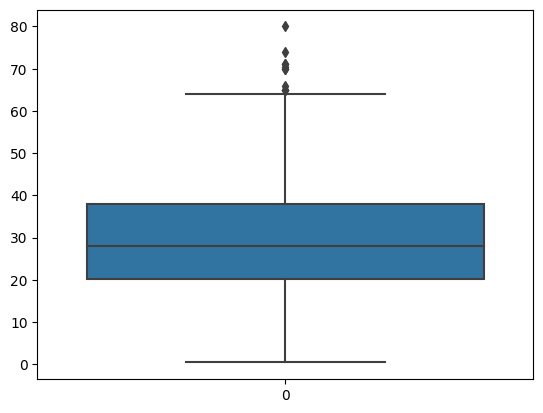

In [ ]:
sns.boxplot(df['Age'])

<ipython-input-35-e5ddecfe4b02>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna())


<Axes: xlabel='Age', ylabel='Density'>

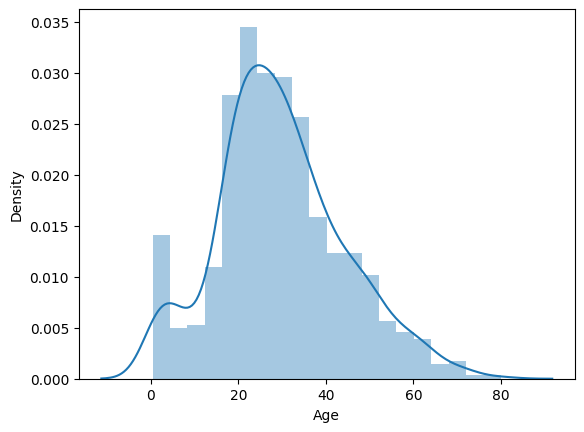

In [ ]:
# data cleaninig
sns.distplot(df['Age'].dropna())

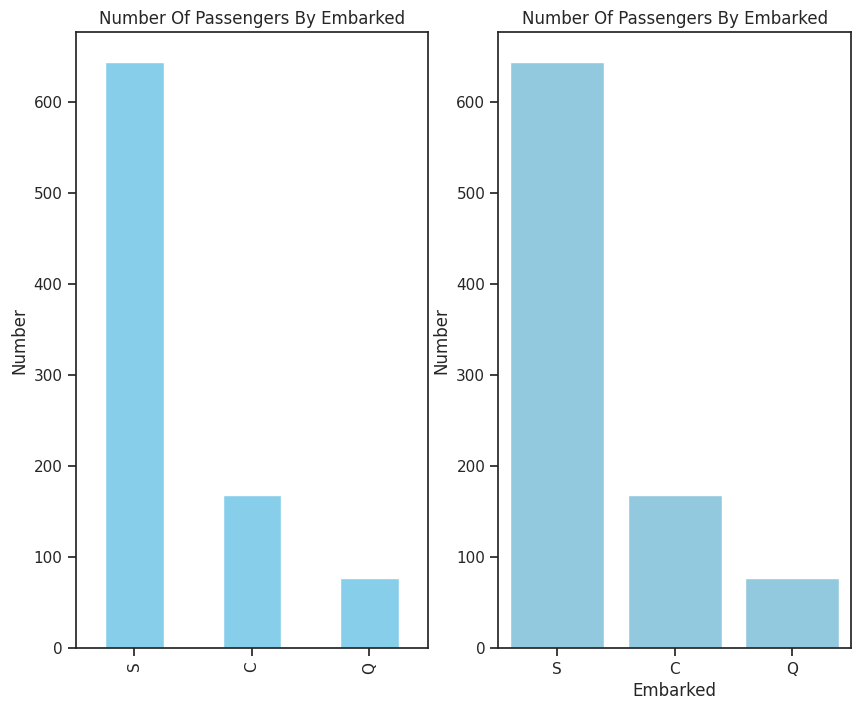

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(10, 8))

# Plot the number of passengers by Embarked port using pandas
df["Embarked"].value_counts().plot.bar(color="skyblue", ax=ax[0])
ax[0].set_title("Number Of Passengers By Embarked")
ax[0].set_ylabel("Number")

# Alternatively, we can use seaborn for the countplot
sns.countplot(x="Embarked", data=df, color="skyblue", ax=ax[1])
ax[1].set_title("Number Of Passengers By Embarked")
ax[1].set_ylabel("Number")

plt.show()
